# Building a classifier for the sarcasm dataset


###### Remember the sarcasm dataset?


In [146]:
#import paskages 
import json

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [128]:
training_size = 20000
vocab_size = 10000
max_length = 32
embedding_dim = 16

trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [129]:
with open("sarcasm.json",'r') as f:
    datastore = json.load(f)

In [130]:
sentences = []
labels = []

In [131]:
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [134]:
#############################

In [135]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [136]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

In [137]:
word_index = tokenizer.word_index

In [138]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


In [139]:
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


In [140]:
# Convert the labels lists into numpy arrays
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

In [141]:
#  GlobalAveragePooling1D 
gap1d_layer = tf.keras.layers.GlobalAveragePooling1D()
sample_array = np.array([[[10,2],[1,3],[1,1]]])
# Print shape and contents of sample array
print(f'shape of sample_array = {sample_array.shape}')
print(f'sample array :\n {sample_array}')


# Pass the sample array to the GAP1D layer
output = gap1d_layer(sample_array)
# Print shape and contents of the GAP1D output array
print(f'output shape of gap1d_layer: {output.shape}')
print(f'output array of gap1d_layer:\n {output.numpy()}')


shape of sample_array = (1, 3, 2)
sample array :
 [[[10  2]
  [ 1  3]
  [ 1  1]]]
output shape of gap1d_layer: (1, 2)
output array of gap1d_layer:
 [[4 2]]


In [142]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [143]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 32, 16)            160000    
                                                                 
 global_average_pooling1d_1  (None, 16)                0         
 6 (GlobalAveragePooling1D)                                      
                                                                 
 dense_14 (Dense)            (None, 24)                408       
                                                                 
 dense_15 (Dense)            (None, 1)                 25        
                                                                 
Total params: 160433 (626.69 KB)
Trainable params: 160433 (626.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [144]:
history = model.fit(training_padded, training_labels, epochs=30, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 2s - loss: 0.5707 - accuracy: 0.6957 - val_loss: 0.4011 - val_accuracy: 0.8340 - 2s/epoch - 3ms/step
Epoch 2/30
625/625 - 2s - loss: 0.3153 - accuracy: 0.8731 - val_loss: 0.3438 - val_accuracy: 0.8551 - 2s/epoch - 2ms/step
Epoch 3/30
625/625 - 1s - loss: 0.2374 - accuracy: 0.9072 - val_loss: 0.3673 - val_accuracy: 0.8420 - 1s/epoch - 2ms/step
Epoch 4/30
625/625 - 1s - loss: 0.1932 - accuracy: 0.9251 - val_loss: 0.3560 - val_accuracy: 0.8547 - 1s/epoch - 2ms/step
Epoch 5/30
625/625 - 1s - loss: 0.1623 - accuracy: 0.9398 - val_loss: 0.3919 - val_accuracy: 0.8442 - 1s/epoch - 2ms/step
Epoch 6/30
625/625 - 2s - loss: 0.1364 - accuracy: 0.9514 - val_loss: 0.4113 - val_accuracy: 0.8480 - 2s/epoch - 2ms/step
Epoch 7/30
625/625 - 2s - loss: 0.1175 - accuracy: 0.9581 - val_loss: 0.4487 - val_accuracy: 0.8454 - 2s/epoch - 2ms/step
Epoch 8/30
625/625 - 1s - loss: 0.1015 - accuracy: 0.9646 - val_loss: 0.4930 - val_accuracy: 0.8399 - 1s/epoch - 2ms/step
Epoch 9/30
625/625 - 1s 

In [149]:
def plot_graphs( history , string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()   

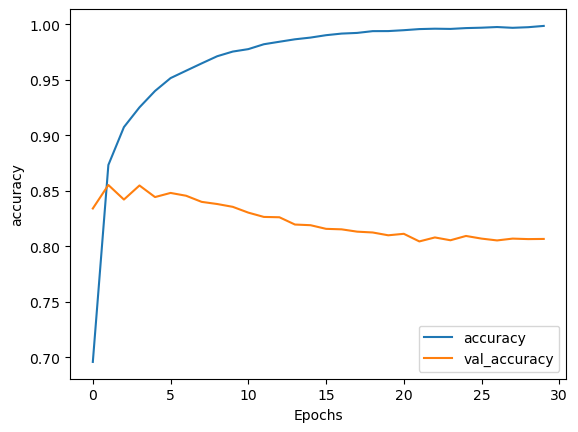

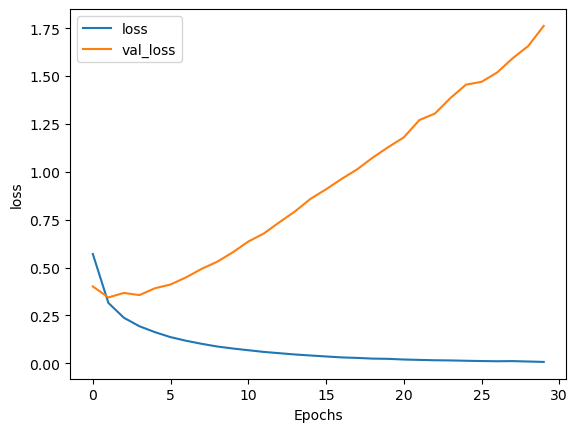

In [150]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")